In [1]:

import os
import matplotlib.pyplot as plt
from dataset import Dataset, Dataloder, get_augmentation, get_preprocessing
import cnn_models as sm
from cnn_models import Unet

root_dir   = os.path.abspath('..')
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

dataset_name = 'bead'
valid_dim    = 128
backbone     = 'efficientnetb0'

output_channels = 1
model           = Unet(backbone, encoder_weights='imagenet', classes= 1, activation='relu')           # model: U-net + EfficientNet
weight_file     = os.path.join(root_dir + '/results', f'{dataset_name}_dim-{valid_dim}_{backbone}', 'model2.h5')
print(weight_file)
model.load_weights(weight_file)

Segmentation Models: using `tf.keras` framework.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2023-03-26 00:40:28.798061: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-03-26 00:40:28.875080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-DGXS-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.53
pciBusID: 0000:08:00.0
2023-03-26 00:40:28.875285: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2023-03-26 00:40:28.876554: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2023-03-26 00:40:28.877673: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2023-03-26 00:40:28.877944: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2023-03-26 00:40:28.879477: I tensorflow/stream_executor/platfo

(None, None, None, 672) (None, None, None, 1280)
(None, None, None, 240) (None, None, None, 256)
(None, None, None, 144) (None, None, None, 128)
(None, None, None, 96) (None, None, None, 64)
/home/shenghua/artifical_confocal2023/results/bead_dim-128_efficientnetb0/model2.h5


In [3]:
# date loader
dataset_dir  = os.path.join(root_dir, f'dataset/{dataset_name}') 
preprocess_input = sm.get_preprocessing(backbone)     # preprocessing configuration
valid_dataset    = Dataset(dataset_dir,   'valid.txt',
                        z_range       = [0, 255],
                        scale         = 100.,
                        augmentation  = get_augmentation(dim = 128, 
                                                            is_train = False),
                        preprocessing = get_preprocessing(preprocess_input))
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)

2023-03-26 00:40:40.615836: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-03-26 00:40:41.883688: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


phase val range: (-0.22644918, 2.4446807)
phase val range: (0.40117678, 81.866806)


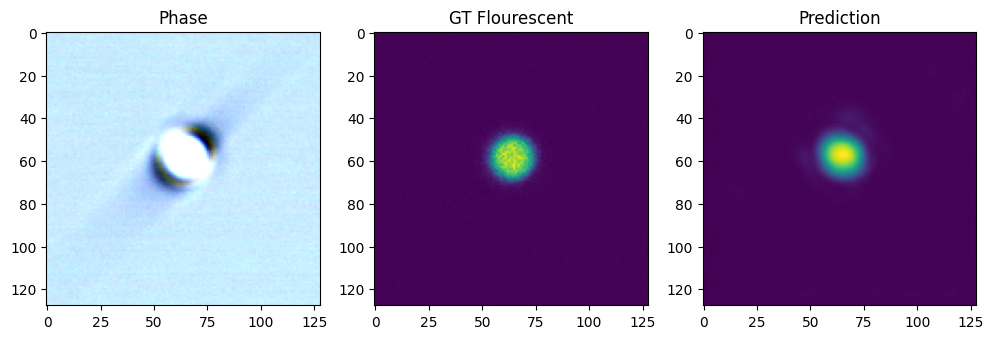

In [4]:
# print(valid_dataloader.dataset.ids)
sample_index = len(valid_dataloader) // 2
valid_sample = valid_dataloader[sample_index]
phase = valid_sample[0]
gt_fl = valid_sample[1].squeeze()
pr_fl = model.predict(phase).squeeze()

fig  = plt.figure(figsize = (12, 4))
ax   = fig.add_subplot(1, 3, 1)
bx   = fig.add_subplot(1, 3, 2)
cx   = fig.add_subplot(1, 3, 3)
ax.imshow(phase.squeeze())
ax.set_title('Phase')
bx.imshow(gt_fl)
bx.set_title('GT Flourescent')
cx.imshow(pr_fl)
cx.set_title('Prediction')
print(f'phase val range: {phase.min(), phase.max()}')
print(f'gt val range: {gt_fl.min(),    gt_fl.max()}')
print(f'gt val range: {gt_fl.min(),    gt_fl.max()}')